In [2]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from src import project_dir

### Plot results from a single dataset experiment

In [3]:
def filter_pareto_idxs_from_df(df, x_label, y_label):
    """Filters a pandas dataframe to keep only the non-dominated values"""
    x = df[x_label]
    y = df[y_label]
    # Initialize a list to store the indices of non-dominated points
    non_dominated_indices = []

    # Iterate through each point in the Series
    for i in range(len(x)):
        # Assume the current point is non-dominated
        dominated = False
        
        # Compare the current point with all other points
        for j in range(len(x)):
            if i != j:
                # Check if the other point dominates the current point
                if (x[j] <= x[i] and y[j] >= y[i]) and (x[j] < x[i] or y[j] > y[i]):
                    dominated = True
                    break

        # If the point is non-dominated, add its index to the list
        if not dominated:
            non_dominated_indices.append(i)

    # Filter the original Series to keep only non-dominated points
    non_dominated_values = df.iloc[non_dominated_indices].reset_index(drop=True)

    return non_dominated_indices, non_dominated_values


def plot_accuracy_vs_cost_from_csv(gates_csvfile, soa_csv_file=None, no_selection_accuracy=None, soa_analogfeat_csv=None, soa_allfeat_csv=None, title='Accuracy vs Cost'):
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # Plot the data from the gates CSV file
    gates_df = pd.read_csv(gates_csvfile)
    ax.scatter(gates_df['cost'], gates_df['accuracy'], marker='o', label='Ours', color='orange')
    # plot only the non-dominated points
    non_dominated_idxs, non_dominated_df = filter_pareto_idxs_from_df(gates_df, 'cost', 'accuracy')
    ax.scatter(non_dominated_df['cost'], non_dominated_df['accuracy'], marker='o', label='Non-dominated', color='red')

    # plot the data from the soa CSV file
    if soa_csv_file is not None:
        soa_df = pd.read_csv(soa_csv_file)
        ax.scatter(soa_df['cost'], soa_df['accuracy'], marker='^', label='SOA', color='green')

    # plot the no selection accuracy as a dashed horizontal red line
    if no_selection_accuracy is not None:
        ax.axhline(y=no_selection_accuracy, color='red', linestyle='--', label='No Selection')

    # plot the soa accuracy with selection from only analog features
    if soa_analogfeat_csv is not None:
        soa_analog_df = pd.read_csv(soa_analogfeat_csv)
        max_accuracy = soa_analog_df['accuracy'].max()
        ax.axhline(y=max_accuracy, color='blue', linestyle='--', label='SOA Analog Features')
        print(f"SoA analog features: max accuracy {max_accuracy}")
        print(f"SoA analog features: solution with max accuracy:\n{soa_analog_df[soa_analog_df['accuracy'] == max_accuracy]}")

        # get all solutions above the max accuracy of the soa analog features
        above_max_accuracy = gates_df[gates_df['accuracy'] >= max_accuracy]
        # print(f"Solutions above SOA Analog Features max accuracy ({max_accuracy}):")
        # print(above_max_accuracy)

    # plot the soa accuracy with selection from all features
    if soa_allfeat_csv is not None:
        soa_all_df = pd.read_csv(soa_allfeat_csv)
        max_accuracy = soa_all_df['accuracy'].max()
        ax.axhline(y=max_accuracy, color='purple', linestyle='--', label='SOA All Features')
        print(f"SoA all features: max accuracy {max_accuracy}")
        print(f"SoA all features: solution with max accuracy:\n{soa_all_df[soa_all_df['accuracy'] == max_accuracy]}")

    # Labels and legend
    ax.set_xlabel('Cost')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # Place legend outside the plot on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()
    return non_dominated_df


Max accuracy from SOA Analog Features: 0.5262449383735657


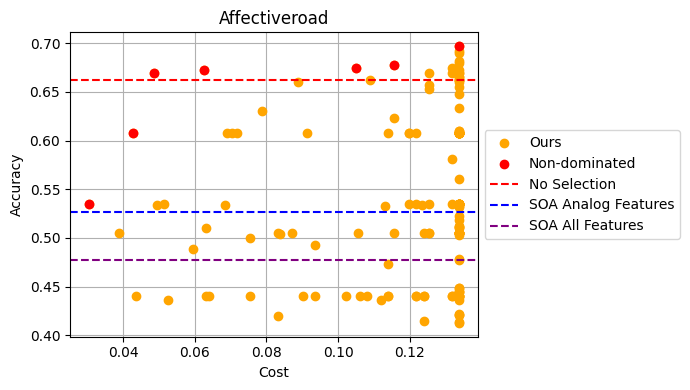

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
1,3,0,0.697044,0.014938,6.919213e-07,3.326339,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.1338
3,3,2,0.677340,0.002729,5.847150e-08,1.875403,0.2,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.1155
2,3,1,0.674877,0.005086,7.312091e-06,1.429884,0.2,"[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 15, 1...",0.1051
5,3,4,0.672414,0.008532,7.273406e-07,15.884793,0.5,"[0, 1, 5, 6, 8, 9, 14, 15, 16, 17, 18, 19, 20]",0.0625
4,3,3,0.669951,0.002831,8.808790e-08,3.630888,0.5,"[0, 1, 2, 4, 7, 11, 13, 16, 21, 22]",0.0486
6,4,4,0.607565,0.029634,9.351799e-09,96.734311,0.5,"[2, 6, 8, 15, 16, 19, 21]",0.0426
0,1,2,0.535076,0.023353,8.313823e-05,13.685819,0.5,"[5, 8, 9, 15, 16, 18, 20, 21]",0.0303


In [4]:
dataset = 'affectiveroad'
expdir = '/home/balaskas/flexaf/saved_logs/affectiveroad/diff_fs_fcnn_affectiveroad___2025.08.07-16.42.13.929'  # fold 3, trial 3, features: [0, 1, 2, 4, 7, 11, 13, 16, 21, 22]
# NOTE: This below is the one i used for analog features
# expdir = '/home/balaskas/flexaf/saved_logs/affectiveroad/diff_fs_fcnn_affectiveroad___2025.08.07-18.45.15.007'  # Fold 3, trial 4, features: [0, 1, 8, 9, 11, 12, 15, 16, 17, 19]
# soa_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_mlp_wesad_merged___2025.08.06-19.42.23.758'

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

soa_analogfeat_dir = '/home/balaskas/flexaf/saved_logs/affectiveroad/sota_fcnn_affectiveroad_analogfeat___2025.08.09-00.35.11.955'
soa_analogfeat_csv = os.path.join(soa_analogfeat_dir, 'statistical_results.csv')

soa_allfeat_dir = '/home/balaskas/flexaf/saved_logs/affectiveroad/sota_fcnn_affectiveroad_allfeat___2025.08.10-03.00.54.700'
soa_allfeat_csv = os.path.join(soa_allfeat_dir, 'statistical_results.csv')

no_selection_accuracy = 0.6626
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile,
                                           soa_csv_file=soa_csvfile, 
                                           no_selection_accuracy=no_selection_accuracy, 
                                           soa_analogfeat_csv=soa_analogfeat_csv,
                                           soa_allfeat_csv=soa_allfeat_csv,
                                           title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)

SoA analog features: max accuracy 0.7260135412216187
SoA analog features: solution with max accuracy:
   fs_method  num_features  total_cost  sparsity  precision  accuracy
64    Fisher            10     0.04875       0.0         32  0.726014
65    Fisher            10     0.04875       0.2         32  0.726014
66    Fisher            10     0.04875       0.2          4  0.726014
67    Fisher            10     0.04875       0.2          6  0.726014
68    Fisher            10     0.04875       0.2          8  0.726014
69    Fisher            10     0.04875       0.2         10  0.726014
70    Fisher            10     0.04875       0.5         32  0.726014
71    Fisher            10     0.04875       0.5          4  0.726014
72    Fisher            10     0.04875       0.5          6  0.726014
73    Fisher            10     0.04875       0.5          8  0.726014
74    Fisher            10     0.04875       0.5         10  0.726014
75    Fisher            10     0.04875       0.9         3

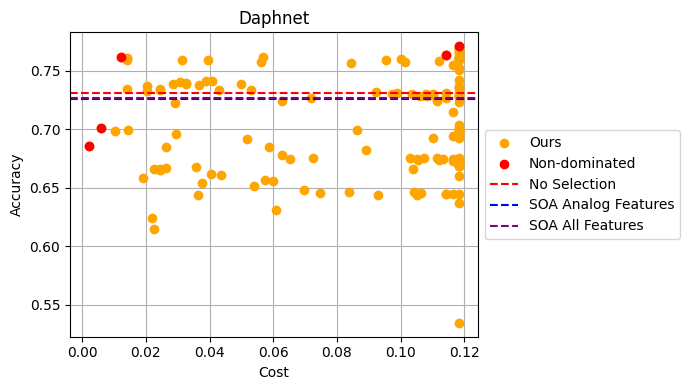

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
0,1,0,0.770895,0.002251,8.941261e-06,12.819577,0.00,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.11835
1,1,0,0.763607,0.002251,8.941261e-06,12.819577,0.05,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.11415
3,2,3,0.762015,0.008658,4.576462e-09,0.229847,0.50,"[28, 29, 31, 32, 33]",0.01220
2,1,1,0.701435,0.004765,2.972096e-05,2.449979,0.50,"[5, 29, 33]",0.00600
4,4,3,0.685322,0.003115,6.571542e-05,3.807062,0.50,[29],0.00200


In [ ]:
dataset = 'daphnet'
expdir = '/home/balaskas/flexaf/saved_logs/daphnet/diff_fs_fcnn_daphnet___2025.08.09-15.54.48.863'  # fold 2, trial 3, features: [28, 29, 31, 32, 33], subjects: ['S01R02', 'S03R03', 'S06R02'], threshold: 0.5
# soa_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_mlp_wesad_merged___2025.08.06-19.42.23.758'

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

soa_analogfeat_dir = '/home/balaskas/flexaf/saved_logs/daphnet/sota_fcnn_daphnet_analogfeat___2025.08.10-10.19.47.641'
soa_analogfeat_csv = os.path.join(soa_analogfeat_dir, 'statistical_results.csv')

soa_allfeat_dir = '/home/balaskas/flexaf/saved_logs/daphnet/sota_fcnn_daphnet_allfeat___2025.08.10-10.19.04.484'
soa_allfeat_csv = os.path.join(soa_allfeat_dir, 'statistical_results.csv') 

no_selection_accuracy = 0.7305
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile, 
                                           soa_csv_file=soa_csvfile,
                                           no_selection_accuracy=no_selection_accuracy,
                                           soa_analogfeat_csv=soa_analogfeat_csv,
                                           soa_allfeat_csv=soa_allfeat_csv,
                                           title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)

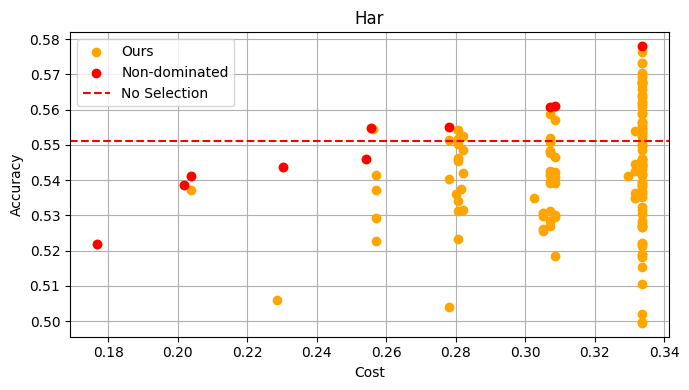

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
0,0,0,0.578019,0.004400,5.658736e-08,1.847698,0.00,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.3336
6,2,2,0.560958,0.002210,6.288644e-09,1.751008,0.50,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...",0.3085
4,1,3,0.560854,0.009035,3.913932e-08,1.000000,0.10,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.3071
9,4,4,0.555220,0.003686,1.503747e-08,1.000000,0.20,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 14, 15, 1...",0.2780
8,4,1,0.554756,0.004959,4.104718e-07,1.000000,0.50,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 15, 16...",0.2555
5,1,4,0.545951,0.004131,3.978959e-07,1.000000,0.50,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.2541
1,1,1,0.543716,0.004178,1.000000e-09,1.000000,0.05,"[0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 1...",0.2304
2,1,1,0.541232,0.004178,1.000000e-09,1.000000,0.10,"[0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 16, 1...",0.2039
3,1,1,0.538748,0.004178,1.000000e-09,1.000000,0.50,"[0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 1...",0.2019
7,3,2,0.521794,0.003515,7.665342e-08,1.000000,0.50,"[0, 1, 2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 17, 1...",0.1768


In [ ]:
dataset = 'har'
expdir = '/home/balaskas/flexaf/saved_logs/har/diff_fs_fcnn_har___2025.08.06-20.57.38.157'  # fold 2, trial 2, features: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
# soa_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_mlp_wesad_merged___2025.08.06-19.42.23.758'

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

no_selection_accuracy = 0.5511
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile, soa_csvfile, no_selection_accuracy, title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)

SoA analog features: max accuracy 0.841735303401947
SoA analog features: solution with max accuracy:
   fs_method  num_features  total_cost  sparsity  precision  accuracy
51      DISR            10     0.03765       0.2          6  0.841735
52      DISR            10     0.03765       0.2          8  0.841735
53      DISR            10     0.03765       0.2         10  0.841735
SoA all features: max accuracy 0.8498924374580383
SoA all features: solution with max accuracy:
    fs_method  num_features  total_cost  sparsity  precision  accuracy
182       JMI            20         0.0       0.5         32  0.849892


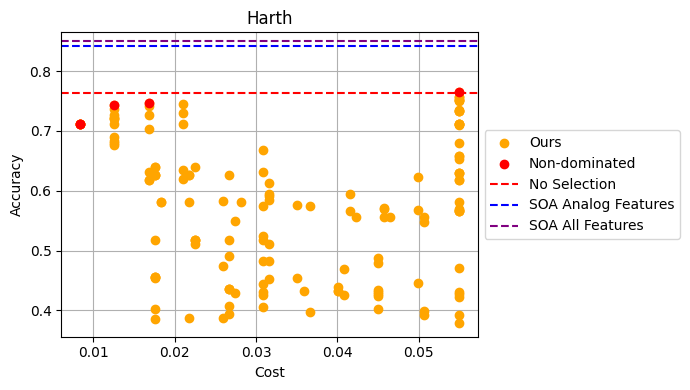

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
4,4,0,0.765449,0.031623,8.607841e-07,3.770179,0.00,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0.0549
0,0,1,0.747163,0.012118,1.990665e-08,0.205341,0.50,"[0, 6, 8, 10]",0.0168
1,1,0,0.742980,0.028462,9.428054e-08,0.178860,0.20,"[4, 6, 10]",0.0126
2,2,2,0.711675,0.039128,3.043853e-05,0.439531,0.01,"[0, 6]",0.0084
3,2,2,0.711675,0.039128,3.043853e-05,0.439531,0.20,"[0, 6]",0.0084


In [ ]:
dataset = 'harth'
# expdir = '/home/balaskas/flexaf/saved_logs/harth/diff_fs_fcnn_harth___2025.08.07-19.46.46.517'  # fold 0, trial 4, features: [0, 1, 5, 12, 16, 17, 20], subjects_to_keep = ['S012', 'S017', 'S022', 'S027', 'S029'], threshold = 0.1
# or: fold 0, trial 1, features: [0, 1, 5, 9, 12, 20], # subjects_to_keep = ['S012', 'S017', 'S022', 'S027', 'S029'], threshold = 0.5

# expdir = '/home/balaskas/flexaf/logs/diff_fs_fcnn_harth___2025.08.09-07.56.42.749'  # Second one to Maha. fold 2, trial 1, features: [0, 1, 5, 12, 13, 15, 16, 17, 20], subjects_to_keep = ['S008', 'S014', 'S019', 'S024', 'S029'], threshold = 0.05

expdir = '/home/balaskas/flexaf/logs/diff_fs_fcnn_harth___2025.08.10-15.39.29.956'  ## Mean/Min only. fold 2, trial 3, features: [0, 1, 3, 6, 7, 11], threshold = 0.2, subjects_to_keep = ['S012', 'S017', 'S022', 'S027']

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

soa_analogfeat_dir = '/home/balaskas/flexaf/saved_logs/harth/sota_fcnn_harth_analogfeat___2025.08.08-21.07.19.545'
soa_analogfeat_csv = os.path.join(soa_analogfeat_dir, 'statistical_results.csv')

soa_allfeat_dir = '/home/balaskas/flexaf/saved_logs/harth/sota_fcnn_harth_allfeat___2025.08.09-15.06.02.647'
soa_allfeat_csv = os.path.join(soa_allfeat_dir, 'statistical_results.csv')

no_selection_accuracy = 0.7636
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile,
                                           soa_csv_file=soa_csvfile,
                                           no_selection_accuracy=no_selection_accuracy,
                                           soa_analogfeat_csv=soa_analogfeat_csv,
                                           soa_allfeat_csv=soa_allfeat_csv,
                                           title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)
# max_accuracy.sort_values(by='accuracy', ascending=False)

SoA analog features: max accuracy 0.673184335231781
SoA analog features: solution with max accuracy:
   fs_method  num_features  total_cost  sparsity  precision  accuracy
70    Fisher            10      0.0399       0.5         32  0.673184
SoA all features: max accuracy 0.6759776473045349
SoA all features: solution with max accuracy:
    fs_method  num_features  total_cost  sparsity  precision  accuracy
123    Fisher            15         0.0       0.9         32  0.675978
173    Fisher            20         0.0       0.9          6  0.675978
174    Fisher            20         0.0       0.9          8  0.675978


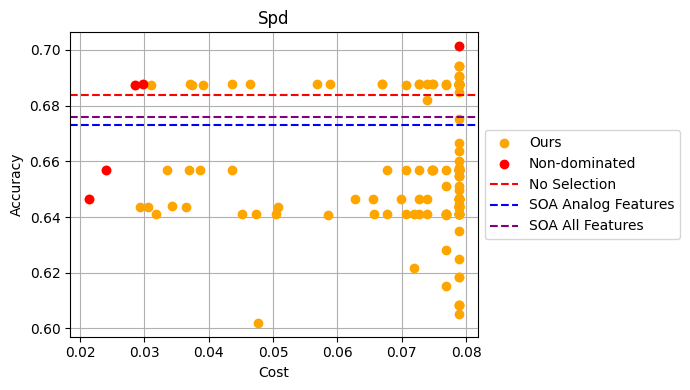

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
1,1,0,0.701370,0.013623,4.655218e-09,0.555660,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.07890
2,1,4,0.687671,0.031669,1.212095e-05,0.339761,0.5,"[1, 3, 4, 7, 9, 10, 15, 19, 20]",0.02975
3,3,0,0.687500,0.039810,1.062146e-08,0.124398,0.5,"[0, 3, 8, 10, 11, 17, 22, 23]",0.02850
4,4,4,0.656863,0.032727,1.645446e-06,4.574838,0.5,"[5, 6, 9, 12, 13, 14, 19, 20]",0.02410
0,0,3,0.646409,0.045353,6.372059e-05,1.438602,0.5,"[1, 4, 6, 8, 15, 21, 23]",0.02135


In [ ]:
dataset = 'spd'
# expdir = '/home/balaskas/flexaf/saved_logs/spd/diff_fs_fcnn_spd___2025.08.06-20.55.49.900'  # fold 1, trial 4, features: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23], subjects_to_keep = [2, 7, 12, 17, 22, 27, 32], threshold = 0.2
# soa_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_mlp_wesad_merged___2025.08.06-19.42.23.758'

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

soa_analogfeat_dir = '/home/balaskas/flexaf/saved_logs/spd/sota_fcnn_spd_analogfeat___2025.08.09-00.31.50.908'
soa_analogfeat_csv = os.path.join(soa_analogfeat_dir, 'statistical_results.csv')

soa_allfeat_dir = '/home/balaskas/flexaf/saved_logs/spd/sota_fcnn_spd_allfeat___2025.08.10-02.55.53.940'
soa_allfeat_csv = os.path.join(soa_allfeat_dir, 'statistical_results.csv')

no_selection_accuracy = 0.6839
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile, 
                                           soa_csv_file=soa_csvfile, 
                                           no_selection_accuracy=no_selection_accuracy, 
                                           soa_analogfeat_csv=soa_analogfeat_csv,
                                           soa_allfeat_csv=soa_allfeat_csv,
                                           title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)
# pareto_df.iloc[2]['features']

SoA analog features: max accuracy 0.744572639465332
SoA analog features: solution with max accuracy:
    fs_method  num_features  total_cost  sparsity  precision  accuracy
187       JMI            20      0.0709       0.9         32  0.744573
SoA all features: max accuracy 0.665867030620575
SoA all features: solution with max accuracy:
   fs_method  num_features  total_cost  sparsity  precision  accuracy
45       JMI             5         0.0       0.9          6  0.665867
46       JMI             5         0.0       0.9          8  0.665867
47       JMI             5         0.0       0.9         10  0.665867


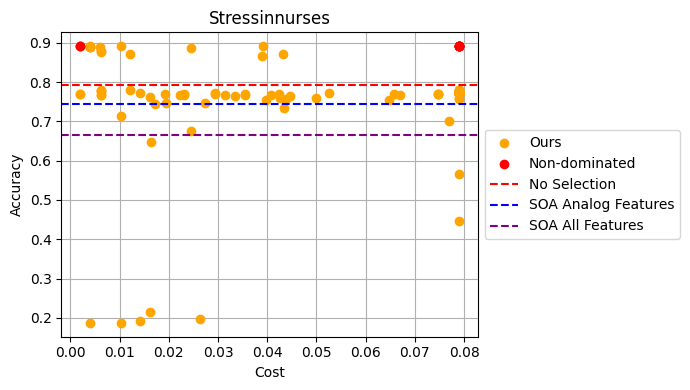

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
0,1,0,0.891213,0.013742,7.480269e-07,5.156399,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0789
1,1,1,0.891213,0.004765,2.972096e-05,2.449979,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0789
2,1,2,0.891213,0.023353,8.313823e-05,2.029068,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0789
4,1,3,0.891213,0.003016,2.624451e-05,2.463014,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0789
5,1,4,0.891213,0.003728,4.506971e-05,1.794612,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0789
3,1,2,0.891213,0.023353,8.313823e-05,2.029068,0.5,[4],0.0020


In [5]:
dataset = 'stressinnurses'
expdir = '/home/balaskas/flexaf/saved_logs/stressinnurses/diff_fs_fcnn_stressinnurses___2025.08.08-11.59.24.548'  # fold 1, trial 1, features: [1, 5], Threshold: 0.05, subjects_to_keep = ['7E', '15', 'CE']
# expdir = '/home/balaskas/flexaf/logs/diff_fs_fcnn_stressinnurses___2025.08.08-12.50.18.628'  # fold 1, trial 2, features: [0, 1, 2, 3, 4, 13, 15, 16, 18, 21, 22, 23], subjects_to_keep = ['7E', '15', 'CE']
# soa_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_mlp_wesad_merged___2025.08.06-19.42.23.758'

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

soa_analogfeat_dir = '/home/balaskas/flexaf/saved_logs/stressinnurses/sota_fcnn_stressinnurses_analogfeat___2025.08.08-22.34.30.019'
soa_analogfeat_csv = os.path.join(soa_analogfeat_dir, 'statistical_results.csv')

soa_allfeat_dir = '/home/balaskas/flexaf/saved_logs/stressinnurses/sota_fcnn_stressinnurses_allfeat___2025.08.09-20.00.29.325'
soa_allfeat_csv = os.path.join(soa_allfeat_dir, 'statistical_results.csv')

no_selection_accuracy = 0.7924
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile, 
                                           soa_csv_file=soa_csvfile, 
                                           no_selection_accuracy=no_selection_accuracy, 
                                           soa_analogfeat_csv=soa_analogfeat_csv,
                                           soa_allfeat_csv=soa_allfeat_csv,
                                           title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)

SoA analog features: max accuracy 0.7394886016845703
SoA analog features: solution with max accuracy:
    fs_method  num_features  total_cost  sparsity  precision  accuracy
150      DISR            20      0.0709       0.5         32  0.739489
SoA all features: max accuracy 0.6834537982940674
SoA all features: solution with max accuracy:
    fs_method  num_features  total_cost  sparsity  precision  accuracy
182       JMI            20         0.0       0.5         32  0.683454


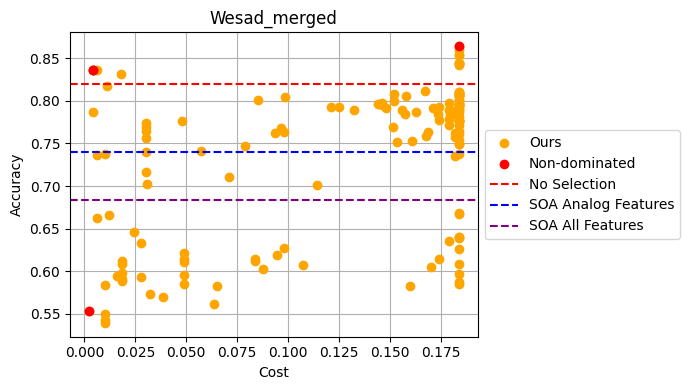

,fold,trial,accuracy,learning_rate,lambda_reg,temperature,threshold,features,cost
1,3,0,0.864232,0.001883,8.983472e-09,0.624101,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.1841
2,4,1,0.836550,0.014206,7.287891e-05,0.267508,0.2,"[20, 45]",0.0040
3,4,1,0.836550,0.014206,7.287891e-05,0.267508,0.5,"[20, 45]",0.0040
0,0,3,0.552953,0.036798,3.271886e-06,1.009567,0.5,[9],0.0020


In [ ]:
dataset = 'wesad_merged'
# expdir = '/home/balaskas/flexaf/saved_logs/wesad_merged/diff_fs_fcnn_wesad_merged___2025.08.06-16.16.48.524'
expdir = '/home/balaskas/flexaf/saved_logs/wesad_merged/diff_fs_fcnn_wesad_merged___2025.08.08-08.00.07.792'  # fold 4, trial 1, features: [20, 45], subjects_to_keep = ['S10', 'S16', 'S5'], threshold = 0.2
# soa_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_mlp_wesad_merged___2025.08.06-19.42.23.758'

csvfile = os.path.join(expdir, 'results', 'gated_model_results.csv')
# soa_csvfile = os.path.join(soa_dir, 'statistical_results.csv')
soa_csvfile = None

soa_analogfeat_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_fcnn_wesad_merged_analogfeat___2025.08.08-19.54.25.800'
soa_analogfeat_csv = os.path.join(soa_analogfeat_dir, 'statistical_results.csv')

soa_allfeat_dir = '/home/balaskas/flexaf/saved_logs/wesad_merged/sota_fcnn_wesad_merged_allfeat___2025.08.09-07.32.07.336'
soa_allfeat_csv = os.path.join(soa_allfeat_dir, 'statistical_results.csv')

no_selection_accuracy = 0.8193
pareto_df = plot_accuracy_vs_cost_from_csv(csvfile, 
                                           soa_csv_file=soa_csvfile, 
                                           no_selection_accuracy=no_selection_accuracy, 
                                           soa_analogfeat_csv=soa_analogfeat_csv,
                                           soa_allfeat_csv=soa_allfeat_csv,
                                           title=dataset.capitalize())
pareto_df.sort_values(by='accuracy', ascending=False)

### Compare greedy vs gates diff vs statistical selection

In [44]:
diff_resdirs = {
    'affectiveroad': os.path.join(project_dir, 'saved_logs', 'affectiveroad', 'diff_fs_fcnn___2025.08.04-19.38.27.709'),
    'har': os.path.join(project_dir, 'saved_logs', 'har', 'diff_fs_fcnn___2025.08.05-10.09.20.724'),
    'harth': os.path.join(project_dir, 'saved_logs', 'harth', 'diff_fs_fcnn___2025.08.05-10.55.53.050'),
    'spd': os.path.join(project_dir, 'saved_logs', 'spd', 'diff_fs_fcnn___2025.08.05-09.31.29.362'),
    'stressinnurses': os.path.join(project_dir, 'saved_logs', 'stressinnurses', 'diff_fs_fcnn___2025.08.05-14.54.59.567'),
    'wesad_merged': os.path.join(project_dir, 'saved_logs', 'wesad_merged', 'diff_fs_fcnn___2025.08.05-08.32.55.185'),
}
greedy_resdirs = {
    'affectiveroad': os.path.join(project_dir, 'saved_logs', 'affectiveroad', 'greedy_affroad___2025.08.04-13.01.24.640'),
    'har': os.path.join(project_dir, 'saved_logs', 'har', 'greedy_fs_fcnn___2025.08.05-13.02.44.883'),
    'harth': os.path.join(project_dir, 'saved_logs', 'harth', 'greedy_fs_fcnn___2025.08.05-13.56.38.673'),
    'spd': os.path.join(project_dir, 'saved_logs', 'spd', 'greedy_fs_fcnn___2025.08.04-16.35.20.745'),
    'stressinnurses': os.path.join(project_dir, 'saved_logs', 'stressinnurses', 'greedy_fs_fcnn___2025.08.05-08.31.48.839'),
    'wesad_merged': os.path.join(project_dir, 'saved_logs', 'wesad_merged', 'greedy_fs_fcnn___2025.08.04-18.39.50.101'),
}
statistical_resdirs = {
    'affectiveroad': os.path.join(project_dir, 'saved_logs', 'affectiveroad', 'sota_mlp___2025.08.04-15.32.14.543'),
    'har': os.path.join(project_dir, 'saved_logs', 'har', 'sota_mlp___2025.08.06-10.33.54.390'),
    'spd': os.path.join(project_dir, 'saved_logs', 'spd', 'sota_mlp___2025.08.06-09.41.13.832'),
    'wesad_merged': os.path.join(project_dir, 'saved_logs', 'wesad_merged', 'sota_mlp___2025.08.05-13.51.30.626'),
}

In [45]:
def parse_diff_logfile(filepath):
    data = []
    model_id = None
    pruned_costs = {}

    # Regular expressions
    model_start_re = re.compile(r"Model (\d+) summary:")
    tuned_accuracy_re = re.compile(r"Test accuracy from tuned model number (\d+): ([0-9.]+)")
    pruned_re = re.compile(
        r"\[PRUNED\] Threshold: ([0-9.]+) \| Features: \d+ \| Cost: ([0-9.]+) \| Accuracy: ([0-9.]+) \| Neurons: \[.*\]"
    )

    with open(filepath, 'r') as f:
        for line in f:
            # Check for model ID
            model_match = model_start_re.search(line)
            if model_match:
                model_id = int(model_match.group(1))
                continue

            # Tuned accuracy
            tuned_match = tuned_accuracy_re.search(line)
            if tuned_match:
                tuned_model_id = int(tuned_match.group(1))
                accuracy = float(tuned_match.group(2))
                # We'll set cost later after we have parsed pruned entries
                data.append({
                    "model_id": tuned_model_id,
                    "threshold": 0.0,
                    "cost": None,
                    "accuracy": accuracy,
                    "is_pruned": False
                })
                continue

            # Pruned line
            pruned_match = pruned_re.search(line)
            if pruned_match:
                threshold = float(pruned_match.group(1))
                cost = float(pruned_match.group(2))
                accuracy = float(pruned_match.group(3))

                data.append({
                    "model_id": model_id,
                    "threshold": threshold,
                    "cost": cost,
                    "accuracy": accuracy,
                    "is_pruned": True
                })

                # Track max cost for threshold = 0.01 per model
                if threshold == 0.01:
                    pruned_costs[model_id] = max(pruned_costs.get(model_id, 0), cost)

    # Post-process to fill cost for unpruned (threshold = 0.0) entries
    for row in data:
        if not row["is_pruned"]:
            row["cost"] = pruned_costs.get(row["model_id"], None)

    return pd.DataFrame(data)

In [56]:
def plot_accuracy_vs_cost(greedy_df=None, diff_df=None, statistical_df=None, title='Accuracy vs Cost'):
    fig, ax = plt.subplots(figsize=(7, 4))
    max_accuracy = 0.0
    
    # Plot greedy
    if greedy_df is not None and not greedy_df.empty:
        ax.scatter(greedy_df['cost'], greedy_df['accuracy'], marker='o', label='Greedy', linestyle='-', color='blue')
        max_accuracy = max(max_accuracy, greedy_df['accuracy'].max())
    
    # Plot differentiable
    if diff_df is not None and not diff_df.empty:
        ax.scatter(diff_df['cost'], diff_df['accuracy'], marker='s', label='Differentiable', linestyle='--', color='orange')
        max_accuracy = max(max_accuracy, diff_df['accuracy'].max())
    
    # Plot statistical
    if statistical_df is not None and not statistical_df.empty and 'cost' in statistical_df.columns:
        # first plot the fp accuracy
        ax.scatter(statistical_df['cost'], statistical_df['fp_accuracy'], marker='^', label='Statistical (FP)', linestyle=':', color='red')
        max_accuracy = max(max_accuracy, statistical_df['fp_accuracy'].max())
        if 'sim_accuracy' in statistical_df.columns:
            ax.scatter(statistical_df['cost'], statistical_df['sim_accuracy'], marker='^', label='Statistical', linestyle=':', color='green')
            max_accuracy = max(max_accuracy, statistical_df['sim_accuracy'].max())
        elif 'accuracy' in statistical_df.columns:
            ax.scatter(statistical_df['cost'], statistical_df['accuracy'], marker='^', label='Statistical', linestyle=':', color='green')
            max_accuracy = max(max_accuracy, statistical_df['accuracy'].max())

    # limit y axis to 20% lower than the maximum accuracy
    # ax.set_ylim(bottom=max_accuracy - 0.2)

    # Labels and legend
    ax.set_xlabel('Cost')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

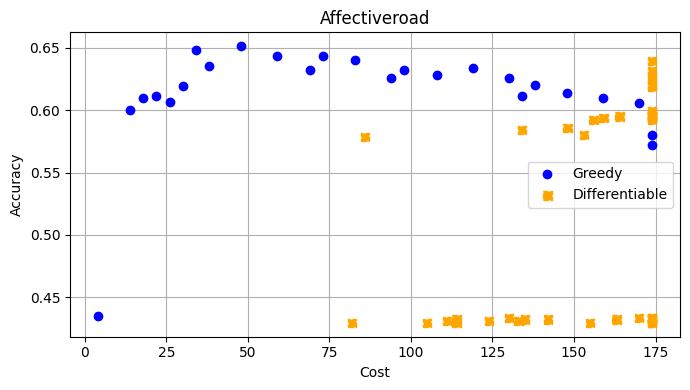

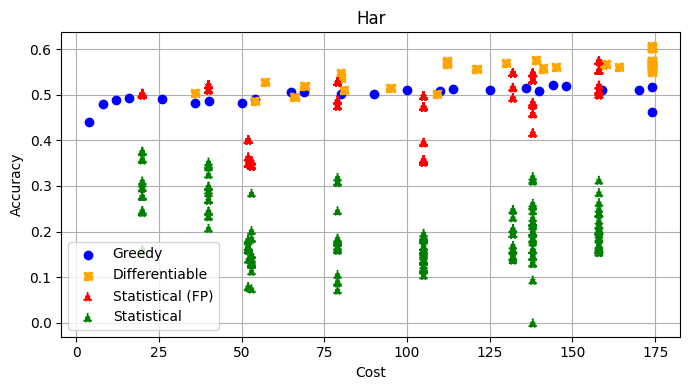

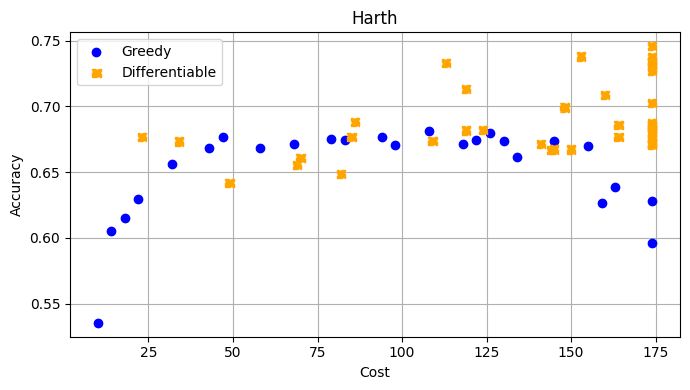

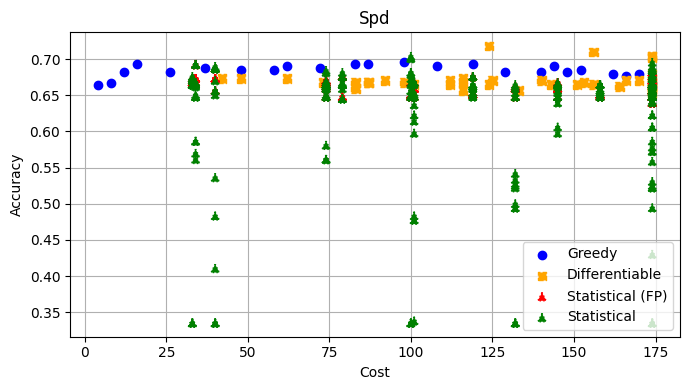

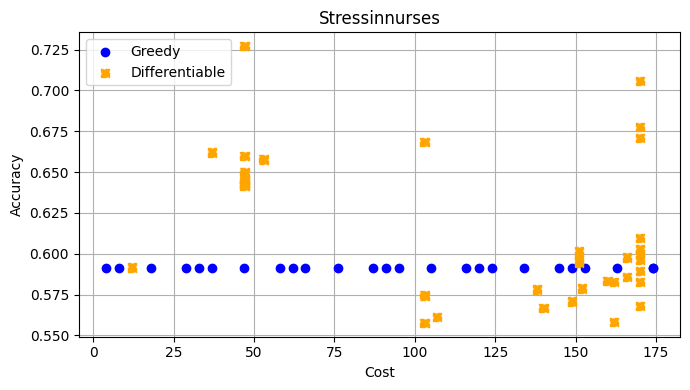

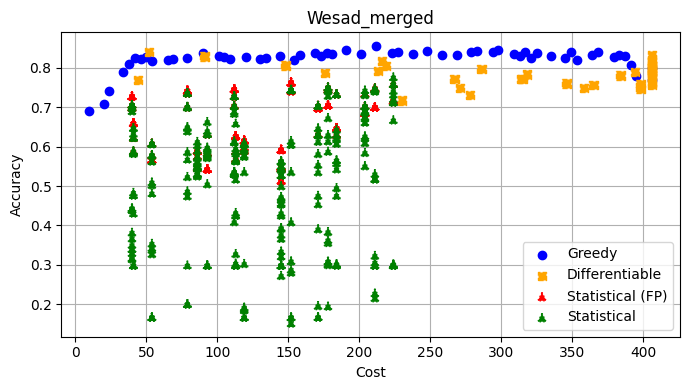

In [57]:
for dataset in diff_resdirs.keys():

    diff_resdir = diff_resdirs.get(dataset, None)
    if diff_resdir is None:
        diff_df = None
    else:
        diff_logfile = os.path.join(diff_resdir, os.path.basename(diff_resdir) + '.log')
        diff_df = parse_diff_logfile(diff_logfile)

    greedy_resdir = greedy_resdirs.get(dataset, None)
    if greedy_resdir is None:
        greedy_df = None
    else:
        greedy_resfile = os.path.join(greedy_resdir, 'greedy_selection_results.csv')
        greedy_df = pd.read_csv(greedy_resfile)

    statistical_resdir = statistical_resdirs.get(dataset, None)
    if statistical_resdir is None:
        statistical_df = None
    else:
        statistical_resfile = os.path.join(statistical_resdir, 'statistical_results.csv')
        statistical_df = pd.read_csv(statistical_resfile)

    plot_accuracy_vs_cost(greedy_df, diff_df, statistical_df, title=dataset.capitalize())

### Plot results from old gates diff experiment

In [ ]:

def plot_feature_selection_tradeoff(results_file):
    """Plot cost vs. accuracy for feature selection experiments."""
    df = pd.read_csv(results_file)

    if not {'method', 'accuracy', 'cost'}.issubset(df.columns):
        raise ValueError("CSV must contain 'method', 'accuracy', and 'cost' columns.")

    plt.figure(figsize=(8, 6))

    # Plot gate-tuned models
    df_gates = df[df['method'].str.contains('gates', case=False)]
    plt.scatter(df_gates['cost'], df_gates['accuracy'], label='With Gates', c='blue', alpha=0.7)

    # Plot baseline (no gates)
    df_baseline = df[df['method'] == 'no_gates_tuned']
    plt.scatter(df_baseline['cost'], df_baseline['accuracy'], label='No Gates (tuned)', c='red', s=100, edgecolors='black')

    # Labels and legend
    plt.xlabel('Cost')
    plt.ylabel('Accuracy')
    plt.title('Feature Selection: Accuracy vs. Cost')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

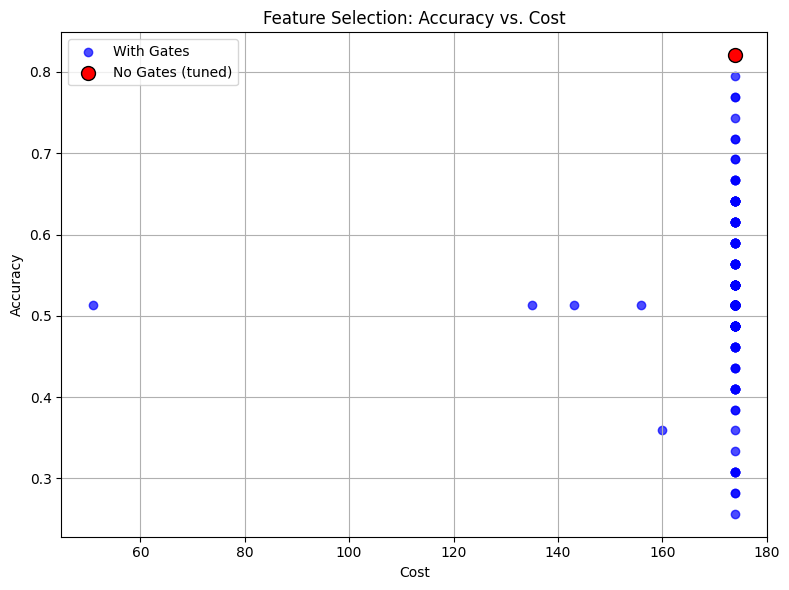

In [ ]:
results_file = os.path.join(project_dir, 'logs', 'concrete_test___2025.07.29-12.31.39.999', 'results.csv')
plot_feature_selection_tradeoff(results_file)